# ECON611 HW2


In [2]:
# Import necessary packages
import datetime
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

currentDT = '2019-09-25 17:24:49.636122'
print(str(currentDT))

2019-09-25 17:24:49.636122


## Warm-up

## Warm-up 1

In [3]:
def reverse_half(data):  
    
    oddLst = (len(data) % 2 == 0)     
    # first determines the list is even or odd number;
    
    if not oddLst:
        index = int((len(data) / 2)) # if it is an odd list, we want only the integer part after the divison: i.e: 3.5 --> 3
        myLst = data[:index]
        print("you input an ODD list, ", data, "\nHALF of the list is\t", myLst)
        myLst = myLst[::-1]          # we reverse the first half of the list;
        myLst += data[index:]        # list concatenation
    else:
        index = len(data) // 2       # similar for even lists
        myLst = data[:index]
        print("you input an EVEN list", data, "\nHALF of the list is\t", myLst)
        myLst = myLst[::-1]
        myLst += (data[index:])

    print("If we reverse the first half of it~\nIt will become\t", myLst)
    return myLst



# test case:
reverse_half([])
print('-'*70)

reverse_half([1,2,3,4,5]) 
print("-"*70)

reverse_half([1,2,3,4,5,6,7])


print('\n')
# ----------------------------------------------------------------------
# Or generalize the cases

def sliceNreverse(data, index):
    f_part = data[:index]
    s_part = data[index:]
    f_part = f_part[::-1]
    return f_part + s_part


def reverse_half_improved(data):
    # find the first half
    even = len(data) // 2
    if even:
        res = sliceNreverse(data, even)
    else:
        res = sliceNreverse(data, even - 1)
    return res

# test case;

print('More Generalized Veriosn test case')
print('*' * 70)
print(reverse_half_improved([1,2,3,4]))
print(reverse_half_improved([1,2,3,4,5,6,7]))


you input an EVEN list [] 
HALF of the list is	 []
If we reverse the first half of it~
It will become	 []
----------------------------------------------------------------------
you input an ODD list,  [1, 2, 3, 4, 5] 
HALF of the list is	 [1, 2]
If we reverse the first half of it~
It will become	 [2, 1, 3, 4, 5]
----------------------------------------------------------------------
you input an ODD list,  [1, 2, 3, 4, 5, 6, 7] 
HALF of the list is	 [1, 2, 3]
If we reverse the first half of it~
It will become	 [3, 2, 1, 4, 5, 6, 7]


More Generalized Veriosn test case
**********************************************************************
[2, 1, 3, 4]
[3, 2, 1, 4, 5, 6, 7]


## Warm-up2

In [4]:
# use a nested for loop to iterate through all the sublists
def addMall(myLst, myTuple):
    outputLst = []
    for i in myLst:
        for j in myTuple:
            outputLst.append((i, j))
    return outputLst


# test case
print('test cases')
print('-'*70)
print(addMall([1, 2, 3,4], ["a", "b", "c", "d"]))



test cases
----------------------------------------------------------------------
[(1, 'a'), (1, 'b'), (1, 'c'), (1, 'd'), (2, 'a'), (2, 'b'), (2, 'c'), (2, 'd'), (3, 'a'), (3, 'b'), (3, 'c'), (3, 'd'), (4, 'a'), (4, 'b'), (4, 'c'), (4, 'd')]


## Warm up 3

In [5]:
# if we are given 2 sorted lists, & we want to get a fianl sorted list with no sublists
# so the logic I used is to concate 2 sorted list and sort them use built in sort function in list operation; 

def addSortedLsts(myLst1, myLst2):
    print("sublists are: \t", myLst1,"&", myLst2)
    testLst = myLst1 + myLst2
    testLst.sort()
    return testLst

# test case
print(addSortedLsts([1, 3, 6], [1, 2, 5, 14]))

sublists are: 	 [1, 3, 6] & [1, 2, 5, 14]
[1, 1, 2, 3, 5, 6, 14]


## Problem 1

for the problem 1 if all packages are allowed, I will try using packages `Pandas` <br>
* in case, outside library is not allowed, I also wrote ceonventioal way for this problem

# first lets visulize the dataset

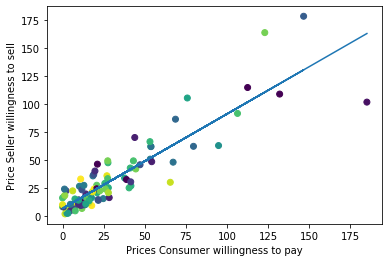

In [21]:
# this simple plt show the relationship 
# between 'consumer willingness to pay' & 'the price sellers willingness to sell'
plt.scatter('IwillPay', 'price', c='stock', data=df)
plt.xlabel('Prices Consumer willingness to pay')
plt.ylabel('Price Seller willingness to sell')
b, m = polyfit(df['IwillPay'], df['price'], 1)
plt.plot(df['IwillPay'], b + m*df['IwillPay'], '-')
plt.show()

# add a regression line above the plots



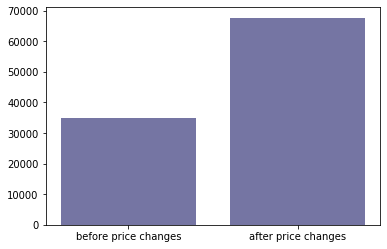

In [20]:
# this simple plt just show the price before and after the price changes;
totalValue0 = df['total value'].sum()
totalValue1 = df1['total value'].sum()
names = ['before price changes', 'after price changes']
totalValues = [totalValue0, totalValue1]
plt.bar(names, totalValues, color=(0.1, 0.1, 0.4, 0.6))
plt.show()

In [6]:
with open("./hw_2.json") as f:
    data = json.load(f)

# transfer all the lists into a Pandas DataFrame
df = pd.DataFrame(data)
df.columns = ['item id', 'stock', 'price', 'IwillPay']

# Create a new col called "total value"
df["total value"] = df.stock * df.price

# print out the descriptive statistics;
print("descriptive statistics")
print("-" * 70)
print(df.describe())
print("-"*70)


print("The most expensive product is:\n", df.nlargest(1, 'price'), '\n', "-" * 70)


print("The 3 least cheap prodcuts are:\n", df.nsmallest(3, 'price'), '\n', "-"* 70)

print("the total value in this market before the change in price is:\n", df['total value'].sum(), '\n',"-" * 70)

df1 = df.copy()

df1.loc[df1['price'] <= 50, 'price'] = 50
df1['total value'] = df1.stock * df1.price

print("after the changes in the market price, the total value in the target is:\n", df1['total value'].sum(),'\n', "-" * 70)


# I am also trying to learn some data vis using matplotlib; so...




descriptive statistics
----------------------------------------------------------------------
          item id       stock       price    IwillPay  total value
count  100.000000  100.000000  100.000000  100.000000   100.000000
mean    49.500000   12.390000   31.452981   29.095432   348.547477
std     29.011492    7.282045   31.782095   33.653694   424.189153
min      0.000000    0.000000    2.010657    0.000000     0.000000
25%     24.750000    6.000000   10.871980    9.191314    98.478614
50%     49.500000   14.000000   21.416505   17.816928   221.578218
75%     74.250000   19.000000   38.016909   39.265483   471.068006
max     99.000000   24.000000  178.676232  185.108844  3117.211452
----------------------------------------------------------------------
The most expensive product is:
     item id  stock       price    IwillPay  total value
68       68      7  178.676232  146.625197  1250.733622 
 ----------------------------------------------------------------------
The 3 least che